<a href="https://colab.research.google.com/github/swetasrng/swetasrng/blob/main/Ethereum_Linear_Regression_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('Ethereum_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])


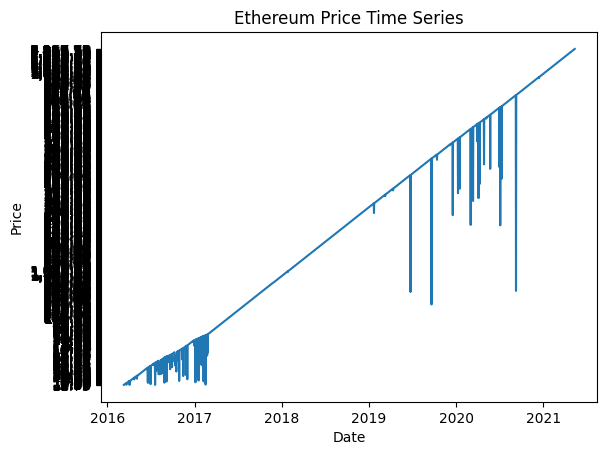

In [3]:
plt.plot(df['Date'], df['Price'])
plt.title('Ethereum Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [4]:
#plot linear regression
df_lr = df[['Date', 'Price']]


In [7]:
# remove commas from 'Price' column and convert to float
df_lr['Price'] = df_lr['Price'].str.replace(',', '').astype(float)


<ipython-input-7-3a8eecb0c4a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['Price'] = df_lr['Price'].str.replace(',', '').astype(float)


In [8]:
# create a new column representing the number of days since the first data point
df_lr['Days'] = (df_lr['Date'] - df_lr['Date'].min()).dt.days

<ipython-input-8-df4c5688c574>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['Days'] = (df_lr['Date'] - df_lr['Date'].min()).dt.days


In [9]:
# create the linear regression model and fit it to the data
lr = LinearRegression()
lr.fit(df_lr[['Days']], df_lr['Price'])

LinearRegression()

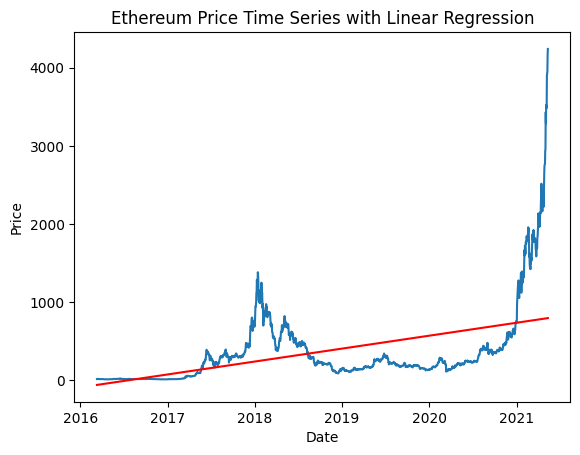

In [10]:
# plot the time series with the linear regression line overlaid
plt.plot(df_lr['Date'], df_lr['Price'])
plt.plot(df_lr['Date'], lr.predict(df_lr[['Days']]), color='red')
plt.title('Ethereum Price Time Series with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()